### Importing the Dataset from Kaggle

In [ ]:
!kaggle competitions download -c spaceship-titanic

In [ ]:
!unzip spaceship-titanic.zip

### Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting Seaborn style
sns.set(style='whitegrid')

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
#total values for each attribute in dataset, output in a row
train_data.count().to_frame().T   # .to_frame().T converts the series(column view) to a Dataframe so we get the horizontal output for better view.

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,8693,8492,8476,8494,8511,8514,8490,8512,8510,8485,8510,8505,8493,8693


In [ ]:
test_data.count().to_frame().T

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,4277,4190,4184,4177,4185,4186,4184,4195,4171,4179,4176,4197,4183


In [ ]:
#Check for missing values
train_data.isna().sum().to_frame().T

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,201,217,199,182,179,203,181,183,208,183,188,200,0


In [ ]:
test_data.isnull().sum().to_frame().T

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0,87,93,100,92,91,93,82,106,98,101,80,94


In [ ]:
#Total Number of missing values in the dataset
train_data.isna().sum().sum()

np.int64(2324)

In [ ]:
test_data.isnull().sum().sum()

np.int64(1117)

In [ ]:
#Duplicate Values in the dataset
train_data.duplicated().sum()

np.int64(0)

In [ ]:
test_data.duplicated().sum()

np.int64(0)

In [ ]:
# Total values in each dataset
train_data.shape

(8693, 14)

In [ ]:
test_data.shape

(4277, 13)

**Count Plot of Transported (Target Variable)**

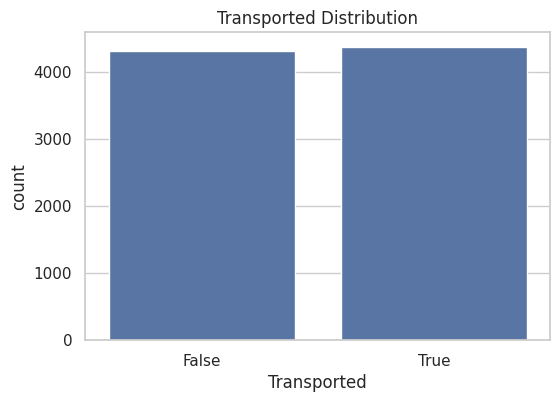

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Transported', data=train_data)
plt.title('Transported Distribution')
plt.show()

**Categorical Column Distributions vs Transported**

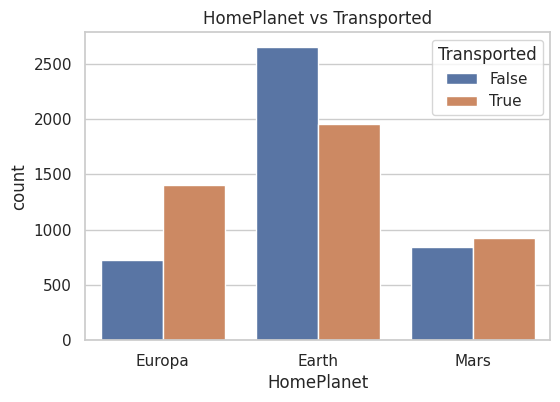

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='HomePlanet', hue='Transported', data=train_data)
plt.title('HomePlanet vs Transported')
plt.show()

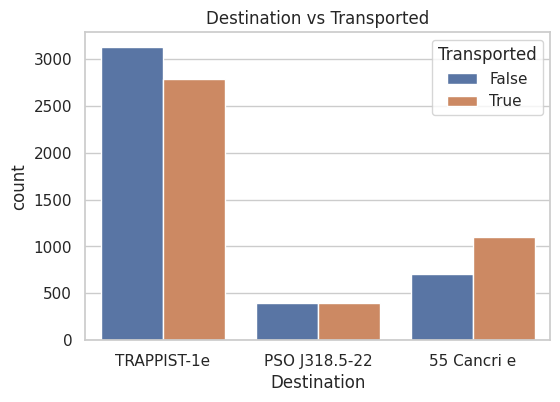

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Destination', hue='Transported', data=train_data)
plt.title('Destination vs Transported')
plt.show()

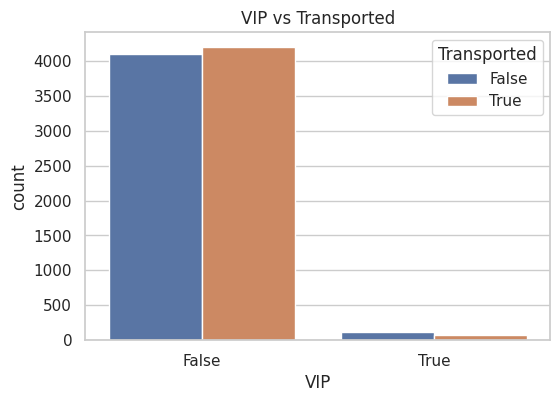

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='VIP', hue='Transported', data=train_data)
plt.title('VIP vs Transported')
plt.show()

**CryoSleep vs Transported**

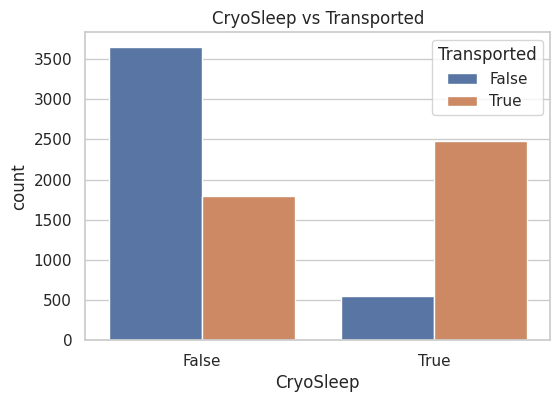

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='CryoSleep', hue='Transported', data=train_data)
plt.title('CryoSleep vs Transported')
plt.show()

**Age Distribution by Transported**

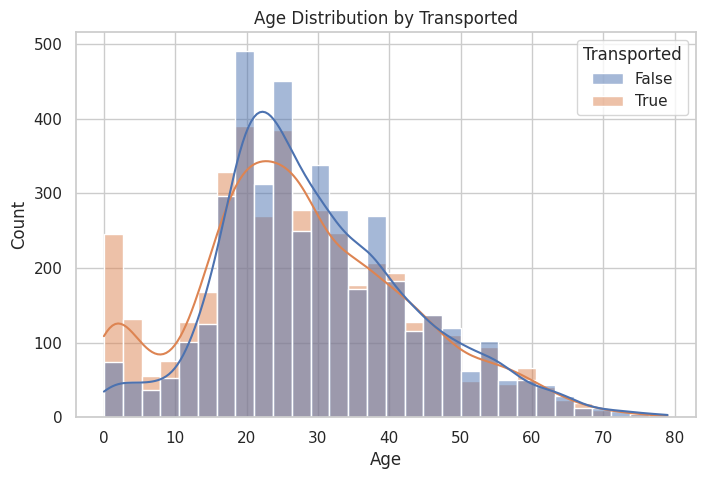

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=train_data, x='Age', hue='Transported', bins=30, kde=True)
plt.title('Age Distribution by Transported')
plt.show()

**Boxplot for Spending Features (e.g., RoomService)**

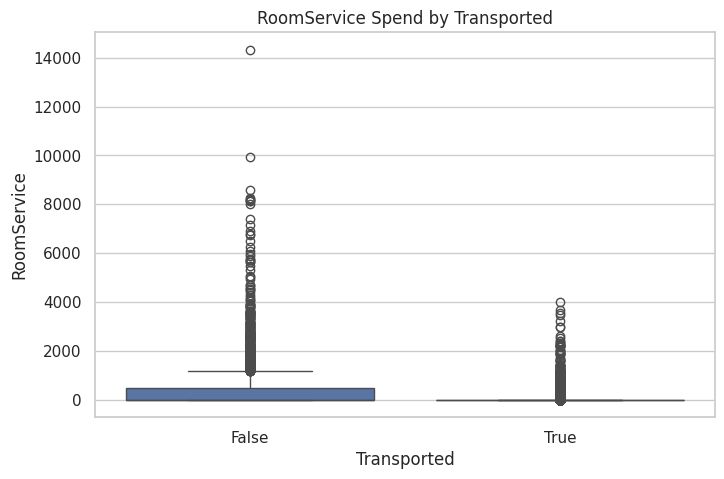

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=train_data, x='Transported', y='RoomService')
plt.title('RoomService Spend by Transported')
plt.show()

**Correlation Heatmap of Numeric Features**

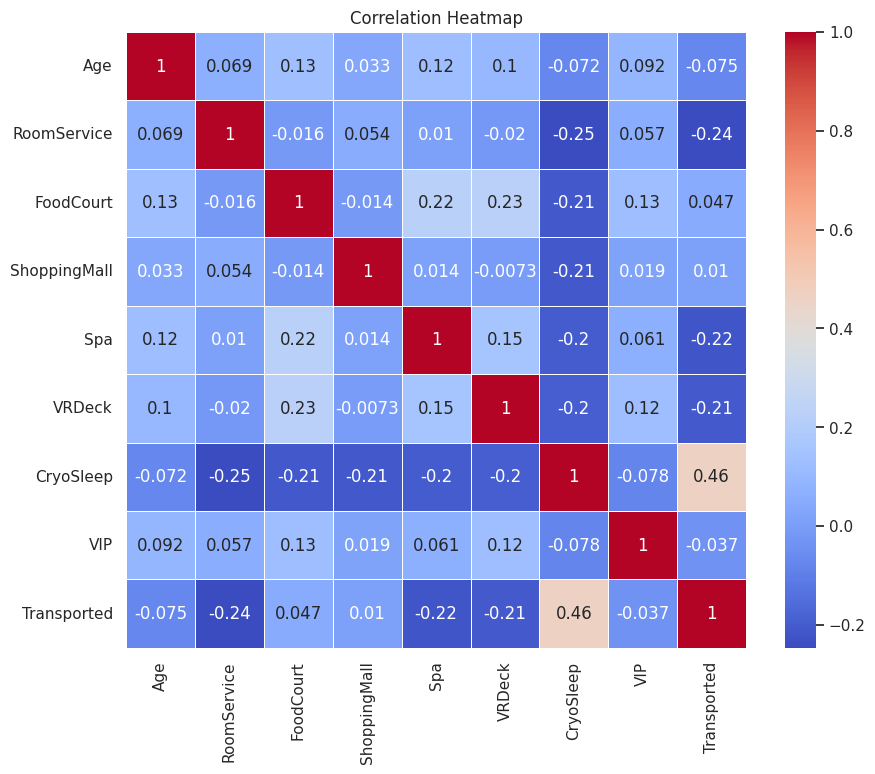

In [ ]:
# Make a copy to avoid modifying original
numeric_data = train_data.copy()

# Convert boolean columns to int after filling NaNs
numeric_data['Transported'] = numeric_data['Transported'].astype(int)
numeric_data['VIP'] = numeric_data['VIP'].fillna(False).astype(bool).astype(int)
numeric_data['CryoSleep'] = numeric_data['CryoSleep'].fillna(False).astype(bool).astype(int)


# Select numeric features
corr = numeric_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP', 'Transported']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Pairplot for Main Spending Columns**

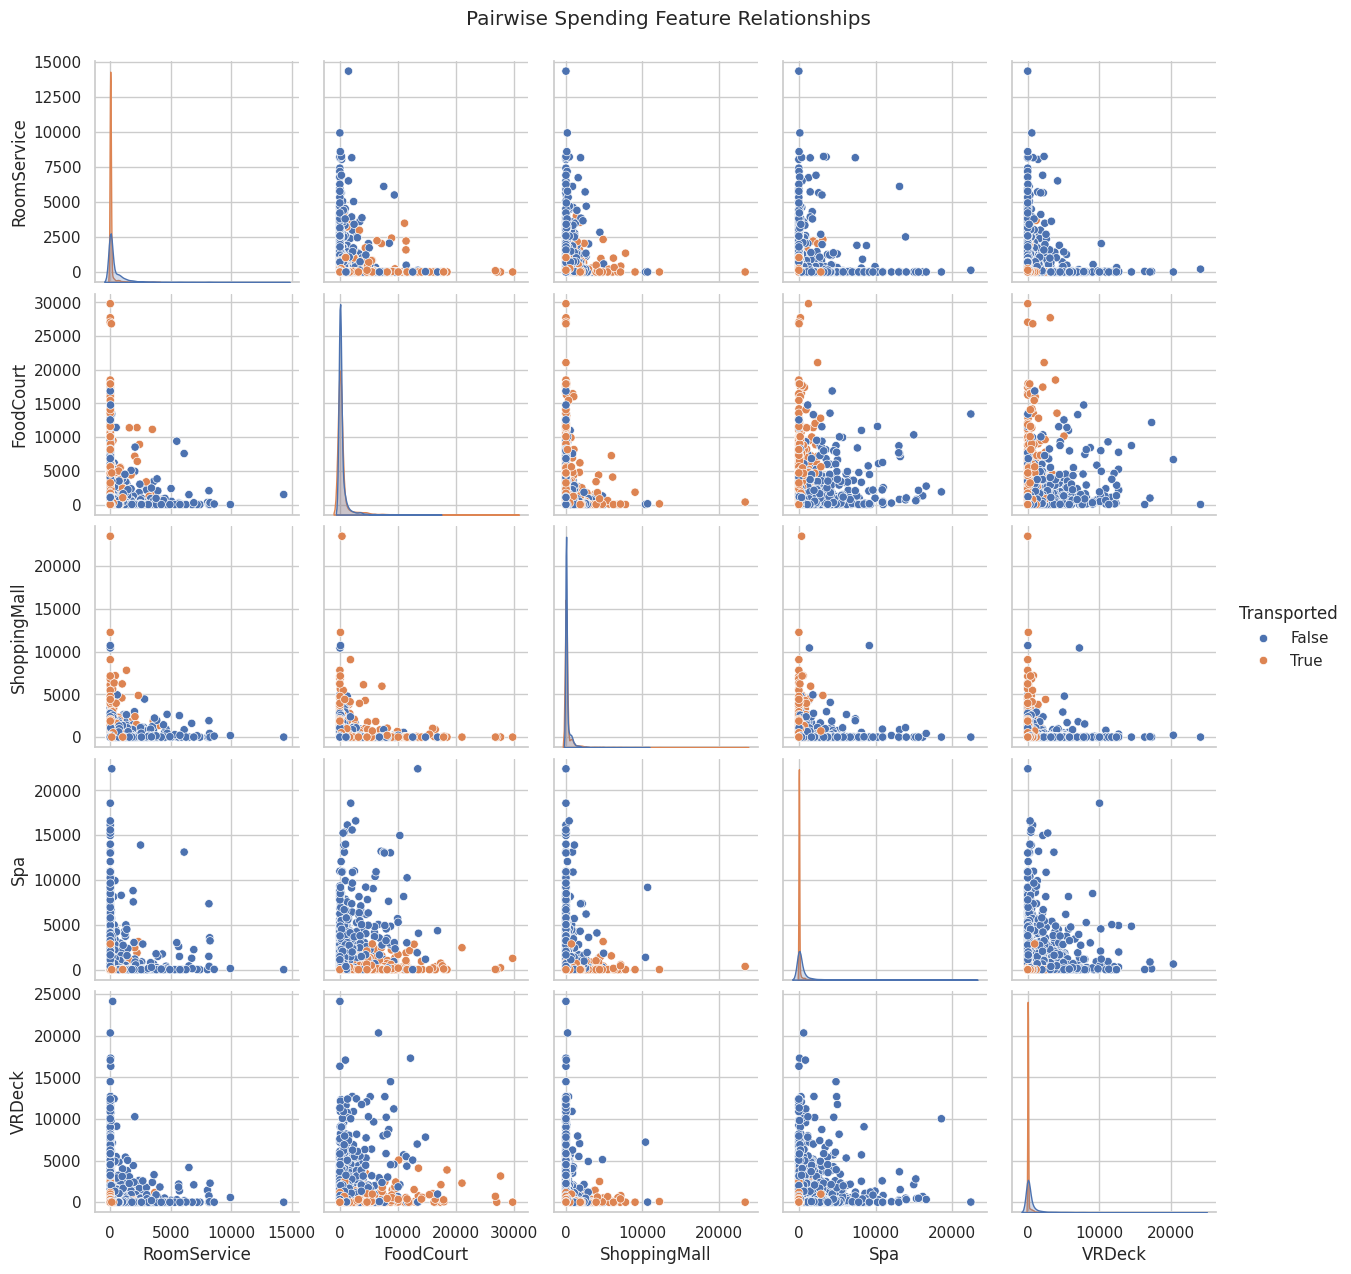

In [ ]:
spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']
sns.pairplot(train_data[spend_cols], hue='Transported', diag_kind='kde')
plt.suptitle('Pairwise Spending Feature Relationships', y=1.02)
plt.show()

## Data PreProcessing

In [ ]:
#Cater missing values in training dataset
train_data['HomePlanet'] = train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0])    # [0]	Gets the first mode value from the result, so you're filling missing values with the most common category.

In [ ]:
train_data['CryoSleep'] = train_data['CryoSleep'].fillna(False);

In [ ]:
train_data['Cabin'] = train_data['Cabin'].ffill();
#fills missing (NaN) values in the 'Cabin' column using the forward fill method (ffill), next value is filled with the previous value.

In [ ]:
train_data['Destination'] = train_data['Destination'].fillna(train_data['Destination'].mode()[0])

In [ ]:
train_data['VIP'] = train_data['VIP'].fillna(False);

In [ ]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean());

In [ ]:
train_data['RoomService'] = train_data['RoomService'].fillna(0);
train_data['FoodCourt'] = train_data['FoodCourt'].fillna(0);
train_data['ShoppingMall'] = train_data['ShoppingMall'].fillna(0);
train_data['Spa'] = train_data['Spa'].fillna(0);
train_data['VRDeck'] = train_data['VRDeck'].fillna(0);

In [ ]:
# Dropping Name from the dataset as it is of no use
train_data.drop('Name', axis=1, inplace=True)

In [ ]:
#Total Number of missing values in the dataset after Handling missing values
train_data.isna().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [ ]:
#Split cabin features
train_data[['Deck', 'Num', 'Side']] = train_data['Cabin'].str.split('/', expand=True)

In [ ]:
#Drop the Cabin attribute
train_data.drop('Cabin', axis=1, inplace=True)

In [ ]:
#Doing the Same for the Test Dataframe to impute missing values
test_data['HomePlanet'] = test_data['HomePlanet'].fillna(test_data['HomePlanet'].mode()[0])
test_data['CryoSleep'] = test_data['CryoSleep'].fillna(False)
test_data['Cabin'] = test_data['Cabin'].ffill()
test_data['Destination'] = test_data['Destination'].fillna(test_data['Destination'].mode()[0])
test_data['VIP'] = test_data['VIP'].fillna(False)
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['RoomService'] = test_data['RoomService'].fillna(0)
test_data['FoodCourt'] = test_data['FoodCourt'].fillna(0)
test_data['ShoppingMall'] = test_data['ShoppingMall'].fillna(0)
test_data['Spa'] = test_data['Spa'].fillna(0)
test_data['VRDeck'] = test_data['VRDeck'].fillna(0)
test_data.drop('Name', axis=1, inplace=True)

In [ ]:
#Total Number of missing values in the dataset after Handling missing values
test_data.isna().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [ ]:
#Split cabin features
test_data[['Deck', 'Num', 'Side']] = test_data['Cabin'].str.split('/', expand=True)

In [ ]:
#Drop the Cabin feture
test_data.drop('Cabin', axis=1, inplace=True)

Encoding Categorical Variables

In [ ]:
# Simply converting binary categories to 0 and 1
train_data['CryoSleep'] = train_data['CryoSleep'].astype(int)
train_data['VIP'] = train_data['VIP'].astype(int)
train_data['Num'] = train_data['Num'].astype(int)

In [ ]:
#Converting categorical features to numerical
combined = pd.concat([train_data, test_data], sort=False)  # To handle all categories
combined = pd.get_dummies(combined, columns=['HomePlanet', 'Destination', 'Deck', 'Side'], drop_first=True)

# Split them back
train_data = combined[:len(train_data)]
test_data = combined[len(train_data):]


In [ ]:
train_data.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,...,False,True,True,False,False,False,False,False,False,False
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,...,False,True,False,False,False,False,True,False,False,True
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,...,False,True,False,False,False,False,False,False,False,True
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,...,False,True,False,False,False,False,False,False,False,True
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,...,False,True,False,False,False,False,True,False,False,True


In [22]:
test_data.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,NaN,...,False,True,False,False,False,False,False,True,False,True
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,NaN,...,False,True,False,False,False,False,True,False,False,True
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,NaN,...,False,False,False,True,False,False,False,False,False,True
3,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,NaN,...,False,True,False,True,False,False,False,False,False,True
4,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,NaN,...,False,True,False,False,False,False,True,False,False,True


## Models

In [23]:
# Splitting the Dataset
from sklearn.model_selection import train_test_split

X = train_data.drop("Transported", axis=1)  # Features
y = train_data["Transported"]               # Target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Drop the target column
X_test = test_data.drop("Transported", axis=1)

*Convert object type to proper boolean (As the type were object*

In [25]:
X_train = X_train.astype(bool)
X_val = X_val.astype(bool)

y_train = y_train.astype(bool)
y_val = y_val.astype(bool)

### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
test_preds = model.predict(X_test)

In [28]:
# Evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on validation/test set
y_pred = model.predict(X_val)

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy * 100)


Accuracy: 72.91546866014951


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[625 236]
 [235 643]]


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_val, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

       False       0.73      0.73      0.73       861
        True       0.73      0.73      0.73       878

    accuracy                           0.73      1739
   macro avg       0.73      0.73      0.73      1739
weighted avg       0.73      0.73      0.73      1739



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 10, 'n_estimators': 50}


### Linear Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_val)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_lr))
print(classification_report(y_val, y_pred_lr))


Logistic Regression Accuracy: 0.7446808510638298
              precision    recall  f1-score   support

       False       0.73      0.78      0.75       861
        True       0.77      0.71      0.74       878

    accuracy                           0.74      1739
   macro avg       0.75      0.74      0.74      1739
weighted avg       0.75      0.74      0.74      1739



### XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_val)
print("XGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb))
print(classification_report(y_val, y_pred_xgb))


XGBoost Accuracy: 0.7446808510638298
              precision    recall  f1-score   support

       False       0.73      0.76      0.75       861
        True       0.76      0.73      0.74       878

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.75      0.74      0.74      1739



### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_val)
print("Gradient Boosting Accuracy:", accuracy_score(y_val, y_pred_gb))
print(classification_report(y_val, y_pred_gb))


Gradient Boosting Accuracy: 0.7487061529614721
              precision    recall  f1-score   support

       False       0.73      0.77      0.75       861
        True       0.77      0.72      0.74       878

    accuracy                           0.75      1739
   macro avg       0.75      0.75      0.75      1739
weighted avg       0.75      0.75      0.75      1739



### SVM

In [40]:
from sklearn.svm import SVC

svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_val)
print("SVM Accuracy:", accuracy_score(y_val, y_pred_svm))
print(classification_report(y_val, y_pred_svm))


SVM Accuracy: 0.7556066705002875
              precision    recall  f1-score   support

       False       0.73      0.79      0.76       861
        True       0.78      0.72      0.75       878

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.76      0.76      0.76      1739



In [42]:
# Prediction on test-set
y_pred_svm = svm_model.predict(X_test)

### Artificial Neural Networks (ANN)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Build ANN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_data=(X_val_scaled, y_val))


Epoch 1/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7090 - loss: 0.5758 - val_accuracy: 0.7562 - val_loss: 0.4997
Epoch 2/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7545 - loss: 0.4975 - val_accuracy: 0.7579 - val_loss: 0.4939
Epoch 3/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7573 - loss: 0.4887 - val_accuracy: 0.7522 - val_loss: 0.4921
Epoch 4/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7679 - loss: 0.4769 - val_accuracy: 0.7476 - val_loss: 0.4946
Epoch 5/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7620 - loss: 0.4754 - val_accuracy: 0.7516 - val_loss: 0.4925
Epoch 6/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7639 - loss: 0.4775 - val_accuracy: 0.7481 - val_loss: 0.4974
Epoch 7/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7599 - loss: 0.4841 - val_accuracy: 0.7510 - val_loss: 0.4971
Epoch 8/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7600 - loss: 0.4877 - val_accuracy: 0.

In [ ]:
# Predict on validation set
y_val_pred_probs = model.predict(X_val_scaled)
y_val_pred = (y_val_pred_probs > 0.5).flatten()

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation Accuracy: 0.7407


### Export the Submission.csv from the Random Forest predictions and SVM

In [44]:
# RFC
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Transported": test_preds
})

submission.to_csv("submission.csv", index=False)

# Random Forest Classifier Wins with 75% accuracy on the test-set.

In [43]:
#SVM

submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Transported": y_pred_svm
})

submission.to_csv("submission.csv", index=False)
